#### Exercici 1. Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

El text escollit és una review d'un producte d'Amazon, concretament una rinyonera FitGriff per anar a córrer: https://www.amazon.es/Fitgriff%C2%AE-Ri%C3%B1oneras-Impermeable-Cremallera-Reflectantes/product-reviews/B07WH7JH6W/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3

In [3]:
review = '''So far, in a couple of outings with him, all correct. Very useful zipper pullers to open and close comfortably. A success to put in the small pocket a small 
hook for keys, so that they do not fall by accident. It seems waterproof and is elastic. I've carried an iphone 14 pro and a small pack of tissues in the large pocket and 
keys in the small pocket and have had no problem. We will have to see over time how the elastic fabric responds (that does not yield with use) and the durability of the zippers, 
weak points in this type of product that I can not yet assess with so little use. In general, for now, everything is fine.'''

In [4]:
words = RegexpTokenizer('\w+').tokenize(review.lower())
words

['so',
 'far',
 'in',
 'a',
 'couple',
 'of',
 'outings',
 'with',
 'him',
 'all',
 'correct',
 'very',
 'useful',
 'zipper',
 'pullers',
 'to',
 'open',
 'and',
 'close',
 'comfortably',
 'a',
 'success',
 'to',
 'put',
 'in',
 'the',
 'small',
 'pocket',
 'a',
 'small',
 'hook',
 'for',
 'keys',
 'so',
 'that',
 'they',
 'do',
 'not',
 'fall',
 'by',
 'accident',
 'it',
 'seems',
 'waterproof',
 'and',
 'is',
 'elastic',
 'i',
 've',
 'carried',
 'an',
 'iphone',
 '14',
 'pro',
 'and',
 'a',
 'small',
 'pack',
 'of',
 'tissues',
 'in',
 'the',
 'large',
 'pocket',
 'and',
 'keys',
 'in',
 'the',
 'small',
 'pocket',
 'and',
 'have',
 'had',
 'no',
 'problem',
 'we',
 'will',
 'have',
 'to',
 'see',
 'over',
 'time',
 'how',
 'the',
 'elastic',
 'fabric',
 'responds',
 'that',
 'does',
 'not',
 'yield',
 'with',
 'use',
 'and',
 'the',
 'durability',
 'of',
 'the',
 'zippers',
 'weak',
 'points',
 'in',
 'this',
 'type',
 'of',
 'product',
 'that',
 'i',
 'can',
 'not',
 'yet',
 'asse

In [5]:
frequency = nltk.FreqDist(words)
frequency

FreqDist({'in': 6, 'and': 6, 'the': 6, 'a': 4, 'of': 4, 'small': 4, 'so': 3, 'with': 3, 'to': 3, 'pocket': 3, ...})

Veiem que les paraules més utilitzades són preposicions, conjuncions i articles, que no aporten cap valor per l'anàlisis de sentiment.

#### Exercici 2. Treu les stopwords i realitza stemming al teu conjunt de dades.

In [6]:
words = [element for element in words if element not in stopwords.words('english')]

In [7]:
frequency = nltk.FreqDist(words)
frequency

FreqDist({'small': 4, 'pocket': 3, 'keys': 2, 'elastic': 2, 'use': 2, 'far': 1, 'couple': 1, 'outings': 1, 'correct': 1, 'useful': 1, ...})

Amb la tècnica stop words hem pogut eliminar les paraules irrellevants. Visualitzem ara les paraules més freqüents:

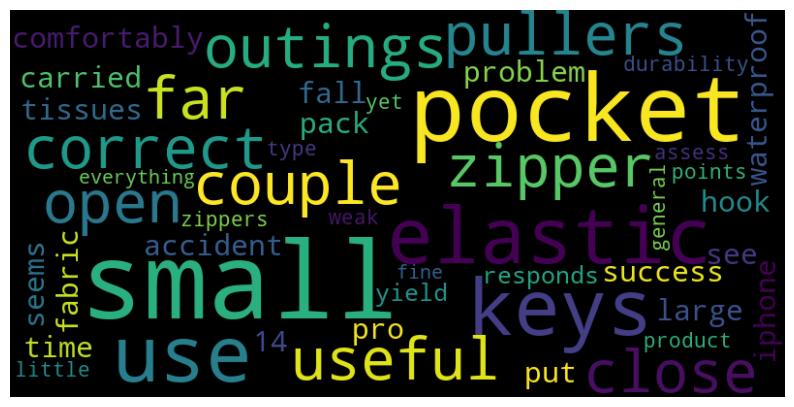

In [8]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(frequency)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

A continuació apliquem la tècnica stemming, que serveix per reduïr les paraules a la seva arrel, eliminat-ne els sufixos.

In [21]:
stemm_words=[PorterStemmer().stem(element) for element in words]
frequency_stemm = nltk.FreqDist(stemm_words)
frequency_stemm

FreqDist({'small': 4, 'use': 3, 'pocket': 3, 'zipper': 2, 'key': 2, 'elast': 2, 'far': 1, 'coupl': 1, 'outing': 1, 'correct': 1, ...})

Veiem que la paraula 'use' ha augmentat la seva freqüència. També la paraula 'pocket'.

#### Exercici 3. Realitza sentiment analysis al teu conjunt de dades.

Primer tornem a agrupar les paraules en una mateixa string i, seguidament, apliquem el Sentiment Intensity Analyzer, de Vader.

In [19]:
processed_text = ' '.join(stemm_words)

In [20]:
analyzer = SentimentIntensityAnalyzer().polarity_scores(processed_text)
analyzer

{'neg': 0.088, 'neu': 0.786, 'pos': 0.126, 'compound': 0.34}

De forma global la review es valora com a neutre, amb un 0.34, més tirant cap a positiva. Veiem que el sentiment 'neu' (neutre) és el que obté una major puntuació, seguit de 'pos' (positiu). El resultat és coherent amb el to de la review.